In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
installs_dtypes = {'application_id': 'category', 'kind': 'category'}

installs = pd.read_csv('installs.csv', dtype = installs_dtypes)
installs["created"] =  pd.to_datetime(installs["created"], errors = "coerce") #parseo de fechas
installs.drop('attributed', axis = 1, inplace = True) #son todas false
installs.drop('click_hash', axis = 1, inplace = True) #son todas NaN

In [3]:
clicks_dtypes = {'advertiser': np.int8, 'action_id': np.float16, 'source_id': np.int8, 'country_code': 'category',
                 'latitude': np.float16, 'longitude': np.float16, 'carrier_id': np.float16, 'brand': np.float16,
                 'touchX': np.float16, 'touchY': np.float16}

clicks = pd.read_csv('clicks.csv', dtype = clicks_dtypes)
clicks["created"] =  pd.to_datetime(clicks["created"], errors = "coerce") #parseo de fechas
clicks.drop('action_id', axis = 1, inplace = True) #todos NaN
clicks.drop('wifi_connection', axis = 1, inplace = True) #todos False

In [4]:
events = pd.read_csv('events.csv', low_memory=False)

events["date"] =  pd.to_datetime(events["date"], errors = "coerce")

In [5]:
auctions_dtypes = {'auction_type_id': np.float16, 'country': 'category', 'platform': 'category',
                   'ref_type_id': 'category', 'source_id': 'category'}

auctions = pd.read_csv('auctions.csv')
auctions["date"] =  pd.to_datetime(auctions["date"], errors = "coerce")
auctions.drop('auction_type_id', axis = 1, inplace = True)  #todas Nan

# Analisis de user agent

In [6]:
def clasificar_user_agent(serie_user_agent, serie_session_user_agent):
    nueva_serie = []
    lista_session = serie_session_user_agent.tolist()
    for indice,user_agent in enumerate(serie_user_agent.tolist()):
        if pd.isna(user_agent):
            session = lista_session[indice]
            if pd.isna(session):
                nueva_serie.append("Unknow")
            elif "Android" in session:
                nueva_serie.append("Android")
            elif "iPhone" in session:
                nueva_serie.append("Iphone")
            else:
                nueva_serie.append("Unknow")
        elif "Android" in user_agent:
            nueva_serie.append("Android")
        elif ("Darwin" in user_agent) or ("CFNetwork" in user_agent):
            nueva_serie.append("Iphone")
        else:
            nueva_serie.append("Error")
    return nueva_serie

installs["os"] = clasificar_user_agent(installs["user_agent"], installs["session_user_agent"])
installs["os"].value_counts()

Unknow     1663
Android     958
Iphone      791
Name: os, dtype: int64

In [7]:
events.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [8]:
eventos_x_cantidad = pd.DataFrame(events["event_id"].value_counts())
eventos_x_cantidad.rename(columns={'event_id':'cantidad'}, inplace=True)
eventos_x_cantidad["event_id"] = eventos_x_cantidad.index
eventos_x_cantidad = eventos_x_cantidad[(eventos_x_cantidad["cantidad"] < 10000) & (eventos_x_cantidad["cantidad"] > 1000)]
eventos_x_cantidad.plot(kind="bar", figsize=(20,7))

In [9]:
events["session_user_agent"].value_counts()

3.819516e+18    1461049
7.164321e+18     649962
1.160952e+18      78232
2.394269e+18      11210
3.831619e+18      10838
6.593868e+18       9911
2.495805e+18       7391
7.512089e+18       6995
7.738334e+18       6770
7.720270e+18       6626
5.254247e+18       6450
4.392265e+18       5998
9.177081e+18       5615
1.244062e+18       5525
3.590748e+18       5448
6.840860e+18       5055
1.637986e+18       4872
5.407282e+18       4619
5.519609e+18       3914
4.525727e+18       3724
4.472077e+18       3657
4.185912e+18       3436
6.105227e+18       3412
8.089178e+18       3326
2.955494e+18       3267
4.259154e+18       3194
4.455209e+18       3008
6.368947e+18       3004
6.091499e+18       2755
8.227345e+18       2496
                 ...   
3.100191e+18          1
6.927155e+18          1
5.527631e+15          1
2.563631e+18          1
7.114784e+18          1
5.730547e+18          1
6.044217e+18          1
4.332253e+18          1
8.112828e+18          1
9.024392e+18          1
6.714208e+18    

In [10]:
installs.loc[pd.isna(installs["user_agent"])]["session_user_agent"].value_counts()

adjust.com                                                                                                                                                                                                                                                                    1592
HasOffers Mobile AppTracking v1.0                                                                                                                                                                                                                                               22
Mozilla/5.0 (iPhone; CPU iPhone OS 12_1_4 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/12.0 Mobile/15E148 Safari/604.1                                                                                                                                       10
Mozilla/5.0 (iPhone; CPU iPhone OS 12_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/72.0.3626.101 Mobile/15E148 Safari/605.1                                 

In [11]:
installs.head()

,created,application_id,ref_type,ref_hash,implicit,device_countrycode,device_brand,device_model,session_user_agent,user_agent,event_uuid,kind,wifi,trans_id,ip_address,device_language,os
0,2019-03-13 01:43:33.445,0,1891515180541284343,8464844987297247076,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,5529284367937637301,NaN,Unknow
1,2019-03-13 04:58:35.078,0,1891515180541284343,3250564871270161533,False,6333597102633388268,3.083059e+17,4.445252e+18,NaN,NaN,NaN,NaN,NaN,NaN,6098022721363533304,NaN,Unknow
2,2019-03-13 04:20:57.666,0,1891515180541284343,7953318831018100268,True,6333597102633388268,5.137992e+17,6.026543e+18,HasOffers Mobile AppTracking v1.0,NaN,0bfa9b4c-e07a-4522-b32d-138e3165ac98,Open,NaN,NaN,4636407223847323867,3.301378e+18,Unknow
3,2019-03-13 04:20:57.698,0,1891515180541284343,7953318831018100268,False,6333597102633388268,5.137992e+17,6.026543e+18,NaN,NaN,NaN,NaN,NaN,NaN,4636407223847323867,NaN,Unknow
4,2019-03-10 22:24:56.684,0,1891515180541284343,8355110941557237501,True,6333597102633388268,1.083369e+18,7.876612e+18,HasOffers Mobile AppTracking v1.0,NaN,8f235a8c-41bf-4399-b33d-c41577c949b0,Open,NaN,NaN,685400811232710215,3.301378e+18,Unknow


In [12]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go

In [13]:
installs.columns

Index(['created', 'application_id', 'ref_type', 'ref_hash', 'implicit',
       'device_countrycode', 'device_brand', 'device_model',
       'session_user_agent', 'user_agent', 'event_uuid', 'kind', 'wifi',
       'trans_id', 'ip_address', 'device_language', 'os'],
      dtype='object')

In [14]:
events.columns

Index(['date', 'event_id', 'ref_type', 'ref_hash', 'application_id',
       'attributed', 'device_countrycode', 'device_os_version', 'device_brand',
       'device_model', 'device_city', 'session_user_agent', 'trans_id',
       'user_agent', 'event_uuid', 'carrier', 'kind', 'device_os', 'wifi',
       'connection_type', 'ip_address', 'device_language'],
      dtype='object')

In [15]:
auctions.columns

Index(['country', 'date', 'device_id', 'platform', 'ref_type_id', 'source_id'], dtype='object')

In [16]:
clicks.columns

Index(['advertiser_id', 'source_id', 'created', 'country_code', 'latitude',
       'longitude', 'carrier_id', 'trans_id', 'os_minor', 'agent_device',
       'os_major', 'specs_brand', 'brand', 'timeToClick', 'touchX', 'touchY',
       'ref_type', 'ref_hash'],
      dtype='object')

In [17]:
installs.implicit.value_counts()

False    2547
True      865
Name: implicit, dtype: int64

In [18]:
installs_by_plataform = auctions[["device_id","platform"]]\
    .merge(installs[["ref_hash"]],left_on="device_id",right_on="ref_hash").drop_duplicates() 
clicks_by_plataform = auctions[["device_id","platform"]]\
    .merge(clicks[["ref_hash"]],left_on="device_id",right_on="ref_hash").drop_duplicates()
events_by_plataform = auctions[["device_id","platform"]]\
    .merge(events[["ref_hash"]],left_on="device_id",right_on="ref_hash").drop_duplicates() 

In [19]:
df_plataform = pd.DataFrame(installs_by_plataform.platform.value_counts())
df_plataform.rename(columns={"platform":"installed"},inplace=True)
df_plataform = df_plataform.join(pd.DataFrame(auctions["platform"].value_counts()))
df_plataform.rename(columns={"platform":"auctions"},inplace=True)
df_plataform = df_plataform.join(clicks_by_plataform.platform.value_counts())
df_plataform.rename(columns={"platform":"clicks"},inplace=True)
df_plataform = df_plataform.join(events_by_plataform.platform.value_counts())
df_plataform.rename(columns={"platform":"events"},inplace=True)

df_plataform["porcentaje_installed"] = df_plataform["installed"] * 100 / df_plataform["auctions"]
df_plataform["porcentaje_events"] = df_plataform["events"] * 100 / df_plataform["auctions"]
df_plataform["porcentaje_clicks"] = df_plataform["clicks"] * 100 / df_plataform["auctions"]

df_plataform["porcentaje_total_installed"] = df_plataform["installed"] *100 / df_plataform["installed"].sum()
df_plataform["porcentaje_total_events"] = df_plataform["events"] *100 / df_plataform["events"].sum()
df_plataform["porcentaje_total_clicks"] = df_plataform["clicks"] *100 / df_plataform["clicks"].sum()
df_plataform

,installed,auctions,clicks,events,porcentaje_installed,porcentaje_events,porcentaje_clicks,porcentaje_total_installed,porcentaje_total_events,porcentaje_total_clicks
2,500,4029494,493,21927,0.012409,0.544163,0.012235,50.301811,25.846948,2.903587
1,494,15541825,16486,62907,0.003179,0.404759,0.106075,49.698189,74.153052,97.096413


In [20]:
df_plataform["porcentaje"] = df_plataform["installed"] * 100 / df_plataform["auctions"]

In [21]:
df_plataform.drop('installed', axis = 1, inplace = True)
df_plataform.drop('auctions', axis = 1, inplace = True)
df_plataform.drop('clicks', axis = 1, inplace = True)
df_plataform.drop('events', axis = 1, inplace = True)
df_plataform = df_plataform.T

In [22]:
df_plataform["porcentaje_installed"].plot(kind="bar")

KeyError: 'porcentaje_installed'

In [ ]:
data = [go.Scatterpolar(
  r = df_plataform["1"].tolist(),
  theta = ['porcentaje_installed','porcentaje_events','porcentaje_clicks'],
    name = '1',
  fill = 'toself'
),go.Scatterpolar(
  r = df_plataform["2"].tolist(),
  theta = ['porcentaje_installed','porcentaje_events','porcentaje_clicks'],
    name = '2',
  fill = 'toself'
)]

layout = go.Layout(
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, 0.6]
    )
  ),
    title='Porcentaje de visitas, checkouts, y conversiones de marcas',
    font= dict(
        size =18
    ),
  showlegend = True
)

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)

In [80]:
def obtener_grafo(df):
    df_from = []
    df_to = []
    last_event = None
    last_ref = None
    for a,row in df.iterrows():
        event = row["event_id"]
        ref = row["ref_hash"]
        
        if ref != last_ref:
            event == None
        elif(event and event != last_event):
            df_from.append(last_event)
            df_to.append(event)
        
        last_ref = ref
        last_event = event
    return pd.DataFrame({"from":df_from,"to":df_to}).drop_duplicates()
        

array([485,  22,   1,  81,  31, 156, 155, 441, 329, 452, 134, 133, 161,
       162, 553, 552,  55, 560,  51,  67,  53,  62,  52,  57, 105,  33,
       109, 310, 171,  50, 272, 328, 121, 376, 256,  58, 347, 348, 349,
       304, 346, 350, 352, 166,  80, 101, 158, 157, 215, 159, 160,  23,
        20,  27,  25, 513, 153,  39,  82,  89,  88,  26, 327,  32, 258,
        56,  64,  60,  54,  72, 257,  68,  63,  59,  66,  65,  69, 510,
       311, 216, 492, 229, 378, 255, 164, 187, 377, 138,  98, 113,  40,
       576,  37, 354, 368, 364, 357, 362, 363, 367, 355, 359,  78, 361,
       273, 274, 188, 191, 189, 450, 493, 135, 276,  86,  83,  84, 124,
       123,  28,  24, 211, 275, 212, 217, 167,  41, 278, 681, 616, 292,
       358, 698, 115, 218, 175, 380, 379])

In [201]:
grafo_eventos = events.loc[events['ref_hash'].isin(installs["ref_hash"].unique()),["date","event_id","ref_hash"]]
grafo_eventos.sort_values("date",inplace=True)
grafo_eventos.sort_values("ref_hash",inplace=True)
grafo_eventos_aristas = obtener_grafo(grafo_eventos)
grafo_eventos_aristas.head(3)

,date,event_id,ref_hash
1799720,2019-03-09 15:28:19.258,22,4958526679100225
1814253,2019-03-09 15:32:44.507,22,4958526679100225
1814304,2019-03-09 15:24:29.697,22,4958526679100225
1814199,2019-03-09 15:24:15.001,22,4958526679100225
1799763,2019-03-09 15:24:07.212,22,4958526679100225
1799726,2019-03-09 15:30:48.140,22,4958526679100225
1836660,2019-03-13 01:11:30.928,82,12589600065022004
1836769,2019-03-13 01:10:08.080,1,12589600065022004
1840148,2019-03-12 20:34:54.187,82,12589600065022004
1840147,2019-03-12 20:34:49.363,81,12589600065022004


,from,to
0,31,156
1,156,31
2,156,22
3,22,31
5,156,155


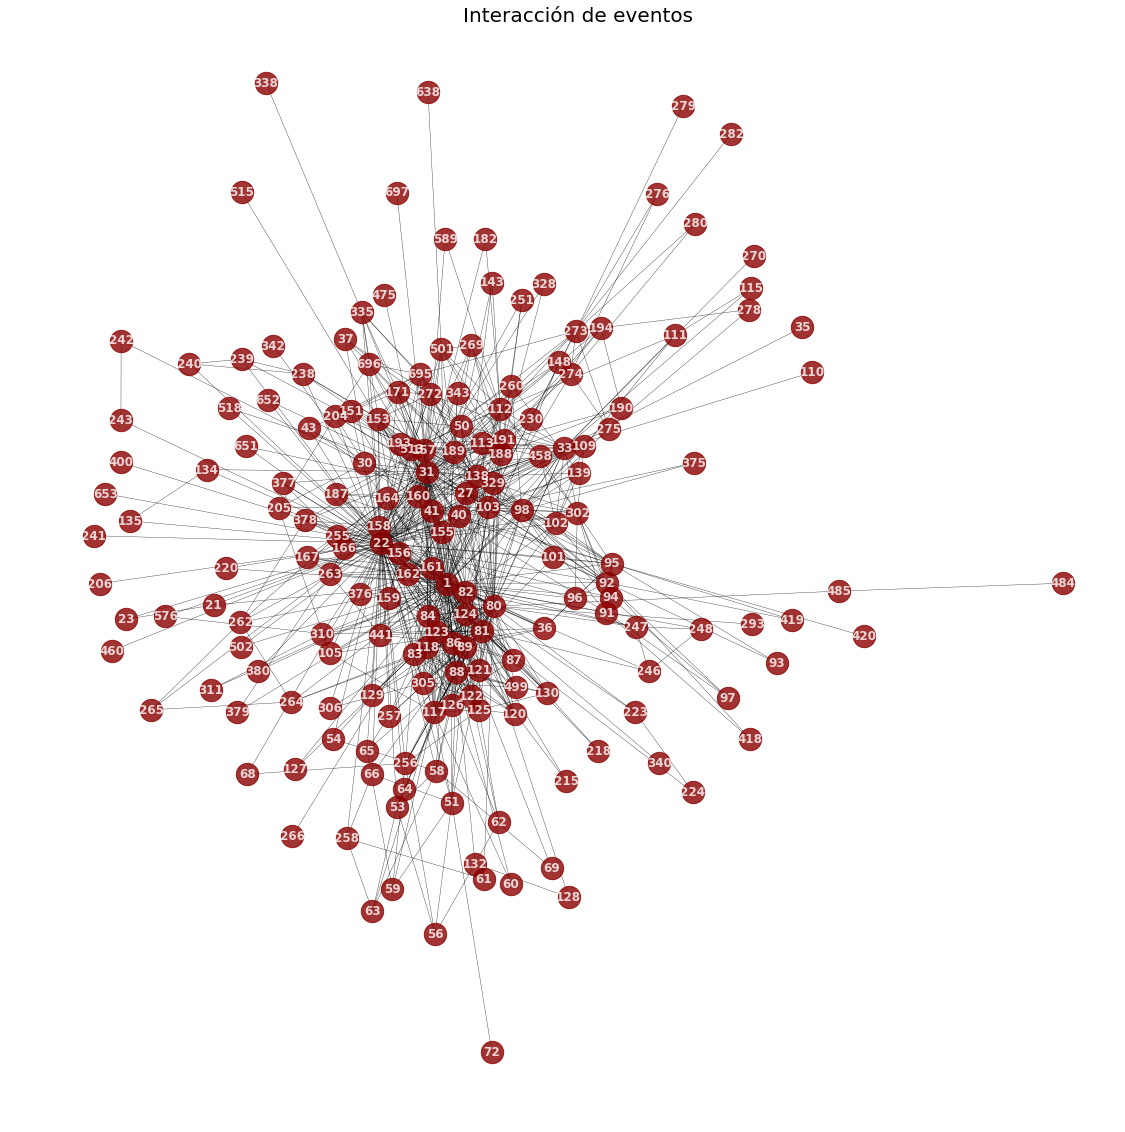

In [204]:
import networkx as nx
 
G=nx.from_pandas_edgelist(grafo_eventos_aristas, 'from', 'to')
plt.figure(figsize=(15,15)) 
nx.draw(G, alpha=0.8, node_size=500, width=0.4, node_color="darkred",font_color="white", font_weight="bold",with_labels=True)
plt.title("Interacción de eventos",size=20)
plt.show()

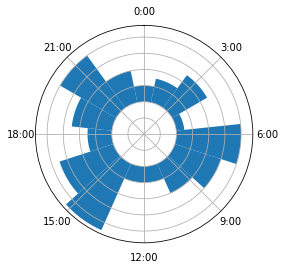

In [247]:
N = 24
bottom = 4
max_height = 10

radii = [2,3,5,1,8,6,4,2,2,9,7,3,5,8,4] 
theta = np.linspace(0.0, 2 * np.pi, len(radii), endpoint=False)
width = (2*np.pi) / len(radii)

ax = plt.subplot(111, polar=True)
bars = ax.bar(theta, radii, width=width, bottom=bottom)
ax.set_yticklabels([])
ax.set_theta_direction(-1)
ax.set_theta_zero_location("N")
ax.set_xticklabels(['0:00', '3:00', '6:00', '9:00', '12:00', '15:00', '18:00', '21:00'])

plt.show()